<a href="https://colab.research.google.com/github/Jorge2018/DataScience2022-2/blob/main/Script_regresionLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

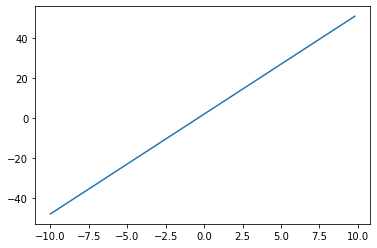

In [70]:
import numpy as np
import matplotlib.pyplot as plt
# B0 is 2 in this case
# B1 is 5 in this case
# I put in numbers to show where they go
x = np.arange(-10., 10., 0.2)
y = 2 + 5* x
plt.plot(x, y)

**Function Sigmoide**

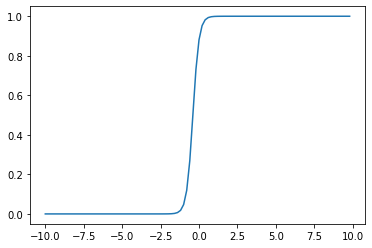

In [71]:
# B0 is 2 in this case
# B1 is 5 in this case
# I put in numbers to show where they go
def sigmoid(x):    
  s = 1 / (1 + np.exp(-(2 + 5*x)))
  return s    
plt.plot(x, sigmoid(x))



In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('https://raw.githubusercontent.com/Jorge2018/RepositorioArchivos/main/cancer.csv')
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Convierte el objetivo en numeros**

In [74]:
df['diagnosis'] = df['diagnosis'].replace({'B':0, 'M':1})


**Visualizacion para la relación entre concave points_worst y diagnosis (objetivo)**

Text(0.5, 0, 'concave points_worst')

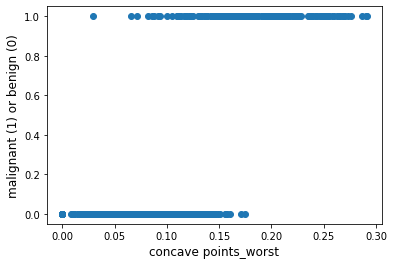

In [75]:
plt.scatter(df['concave points_worst'], df['diagnosis'])
plt.ylabel('malignant (1) or benign (0)', fontsize = 12)
plt.xlabel('concave points_worst', fontsize = 12)


**Intento de regresión lineal para clasificar los datos**

**Separa X, y**

In [85]:
# Assign feature matrix and target vector
X = df[['concave points_worst']]
y = df['diagnosis']
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



Text(0.5, 0, 'concave points_worst')

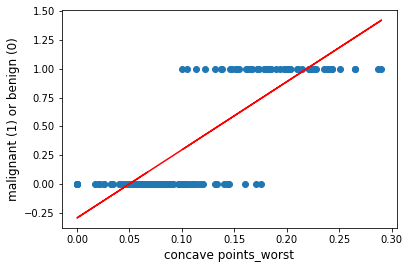

In [86]:
# Make a linear regression instance
lr = LinearRegression()
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
lr.fit(X_train,y_train)
# Get Predictions
predictions = lr.predict(X_test)
# This code shows how to graph the results comparing the prediction with the actual value
plt.scatter(X_test['concave points_worst'], y_test)
plt.plot(X_test['concave points_worst'], predictions, color='red')
plt.ylabel('malignant (1) or benign (0)', fontsize = 12)
plt.xlabel('concave points_worst', fontsize = 12)



**De acuerdo con esto, cualquier valor de predicción (rojo) >= 0,5 (que corresponde al valor cerca de 0,15 para worst_concave_point), predecimos una clase 1 (maligno), sino predecimos una clase de 0 (benigno).**

**Problema: Si el valor para worse_concave_points is 0,0, ¿qué significa cuando tenemos -0,25 para nuestra clase en lugar de 1 o 0? Parece extraño. Quizás deberíamos restringir nuestras predicciones entre 0 y 1.  Eso se puede hacer usando la regresión logística.**

# Regresion Logistica

In [87]:
# Make an instance of the model
logreg = LogisticRegression(C = 1000)
# Instantiate Scaler
scaler = StandardScaler()
# Create pipeline
logreg_pipe = make_pipeline(scaler, logreg)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
logreg_pipe.fit(X_train,y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1000))])

In [88]:
# This code is just to plot/visualize the predictions
example_df = pd.DataFrame(data = {'worst_concave_points': X_test['concave points_worst'],
                     'diagnosis': y_test})
example_df['logistic_preds'] = pd.DataFrame(logreg_pipe.predict_proba(X_test)).loc[:, 1].values
example_df = example_df.sort_values(['logistic_preds'])



Text(0.5, 0, 'concave points_worst')

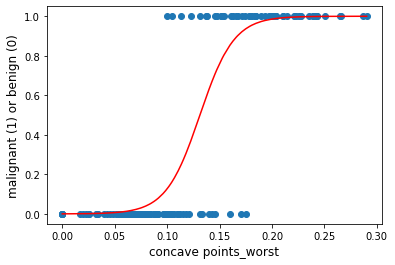

In [89]:
plt.scatter(X_test['concave points_worst'], y_test)
plt.plot(example_df['worst_concave_points'], example_df['logistic_preds'].values, color='red')
plt.ylabel('malignant (1) or benign (0)', fontsize = 12)
plt.xlabel('concave points_worst', fontsize = 12)